## Creating k-folds for 30 Days of ML Challenge, by Juan Torres
#### Based on Abhishek Thakur's tutorials and notebooks:
https://www.youtube.com/watch?v=t5fhRP62YdE

https://www.kaggle.com/abhishek/30-days-create-folds

Yesterday we set up a pipeline to streamline and simplify the data processing and code in general, and we found that good results are achieved while using one-hot encoding and an XGBoost model. Having done that, we established the next steps to be optimization of the parameters, and implementation of cross validation in our model. Today, we will first implement cross validation into our models by following Abhishek Thakur's videos and notebooks. The way he starts is by first dividing the train data into k-folds, so we will do exactly that in this notebook.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import model_selection

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/30-days-of-ml/sample_submission.csv
/kaggle/input/30-days-of-ml/train.csv
/kaggle/input/30-days-of-ml/test.csv


In [2]:
# Load the training data.
df_train = pd.read_csv("../input/30-days-of-ml/train.csv") 

# Check the data shape.
df_train.shape

(300000, 26)

In [3]:
# We create a new column in the training data that represents which fold each row belongs to. For now, we set this value to be -1 in all rows.
df_train["kfold"] = -1

# Take a peek at the training data
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,1,B,B,B,C,B,B,A,E,C,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,-1
1,2,B,B,A,A,B,D,A,F,A,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,-1
2,3,A,A,A,C,B,D,A,D,A,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,-1
3,4,B,B,A,C,B,D,A,E,C,...,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,-1
4,6,A,A,A,C,B,D,A,E,A,...,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,-1


In [4]:
# Now we implement the K-Folds cross-validator, which provides train/test indices to split data in train/test sets by splitting the dataset into k consecutive folds.

kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=1)
for fold, (train_indices, valid_indices) in enumerate(kf.split(X=df_train)):
    df_train.loc[valid_indices, "kfold"] = fold

# Take a peek at the training data.
df_train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,kfold
0,1,B,B,B,C,B,B,A,E,C,...,0.160266,0.310921,0.389470,0.267559,0.237281,0.377873,0.322401,0.869850,8.113634,4
1,2,B,B,A,A,B,D,A,F,A,...,0.558922,0.516294,0.594928,0.341439,0.906013,0.921701,0.261975,0.465083,8.481233,0
2,3,A,A,A,C,B,D,A,D,A,...,0.375348,0.902567,0.555205,0.843531,0.748809,0.620126,0.541474,0.763846,8.364351,4
3,4,B,B,A,C,B,D,A,E,C,...,0.239061,0.732948,0.679618,0.574844,0.346010,0.714610,0.540150,0.280682,8.049253,1
4,6,A,A,A,C,B,D,A,E,A,...,0.420667,0.648182,0.684501,0.956692,1.000773,0.776742,0.625849,0.250823,7.972260,0


As we can see, each row now has its corresponding kfold value, which specifies which fold it belongs to. Since we set n_splits = 5, we should have a value of 300000/5 = 60000 rows per fold. Let's check that:

In [5]:
# Check value counts for each k-fold in our training data.
df_train.kfold.value_counts()

0    60000
1    60000
2    60000
3    60000
4    60000
Name: kfold, dtype: int64

One important thing to do is ensure that the target distribution is similar through all the folds, we do that with the following code:

<AxesSubplot:>

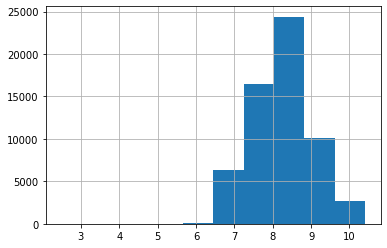

In [6]:
# Check the target histogram distribution for fold 4. To see other folds, change the kfold == value.
df_train[df_train.kfold==4].target.hist()

Target distribution is very similar across folds, so everything should be fine. Finally, let's create a new .csv file with our defined folds:

In [7]:
df_train.to_csv("train_folds.csv", index=False)

After this notebook, we have successfully created a new .csv file which has the training data divided into folds of equal size. This will be useful for implementing cross validation into our model, and while runtimes might increase, we will get better results as now we're going to be using all of the data.